In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [50]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

In [51]:
# From Covid Tracking API
# https://covidtracking.com/api/
# Getting sporadic 403 errors when attempting to read URLs directly
# in Pandas so downloading files locally first
api_us = 'https://covidtracking.com/api/us/daily'
api_states = 'https://covidtracking.com/api/states/daily'

f_us = 'data/api_us.json'
f_states = 'data/api_states.json'

f_pop = 'associated-data/us_census_data/us_census_2018_population_estimates_states.csv'

In [27]:
r = requests.get(api_us, allow_redirects=True)
open(f_us, 'wb').write(r.content)

r = requests.get(api_states, allow_redirects=True)
open(f_states, 'wb').write(r.content)

3696

In [52]:
df_us = pd.read_json(f_us)
df_states = pd.read_json(f_states)
df_pop = pd.read_csv(f_pop)

In [53]:
df_us.shape

(17, 8)

In [54]:
df_states.shape

(813, 8)

In [55]:
df_us.tail()

,date,states,positive,negative,posNeg,pending,death,total
12,20200316,56,4019,36104,40123,1691,71.0,41714
13,20200317,56,5723,47604,53327,1687,90.0,54957
14,20200318,56,7731,66225,73956,2538,112.0,76495
15,20200319,56,11723,89119,100842,3025,160.0,103867
16,20200320,56,17028,118147,135175,3336,219.0,138511


In [56]:
df_states.tail()

,date,state,positive,negative,pending,death,total,dateChecked
808,20200320,VT,29,779.0,NaN,2.0,808,2020-03-20T20:00:00Z
809,20200320,WA,1376,19336.0,NaN,74.0,20712,2020-03-20T20:00:00Z
810,20200320,WI,206,3455.0,NaN,3.0,3661,2020-03-20T20:00:00Z
811,20200320,WV,7,219.0,13.0,0.0,239,2020-03-20T20:00:00Z
812,20200320,WY,19,331.0,NaN,NaN,350,2020-03-20T20:00:00Z


In [57]:
df_pop.head()

,state,state_name,geo_id,population,pop_density
0,AL,Alabama,1,4887871,96.509389
1,AK,Alaska,2,737438,1.291523
2,AZ,Arizona,4,7171646,63.135855
3,AR,Arkansas,5,3013825,57.919684
4,CA,California,6,39557045,253.906502


In [58]:
df_us['date'] = df_us['date'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df_states['date'] = df_states['date'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [59]:
# Merge in population data
df_states = pd.merge(df_states, df_pop, on='state')

# Calculate positive as percent of population
df_states['pos_by_pop'] = df_states['positive'] / df_states['population']

In [60]:
df_states.tail()

,date,state,positive,negative,pending,death,total,dateChecked,state_name,geo_id,population,pop_density,pos_by_pop
788,2020-03-10,WY,0,0.0,0.0,NaN,0,2020-03-10T20:00:00Z,Wyoming,56,577737,5.950611,0.000000
789,2020-03-09,WY,0,NaN,NaN,NaN,0,2020-03-09T20:00:00Z,Wyoming,56,577737,5.950611,0.000000
790,2020-03-08,WY,0,NaN,NaN,NaN,0,2020-03-08T20:00:00Z,Wyoming,56,577737,5.950611,0.000000
791,2020-03-07,WY,0,NaN,NaN,NaN,0,2020-03-07T21:00:00Z,Wyoming,56,577737,5.950611,0.000000
792,2020-03-20,WY,19,331.0,NaN,NaN,350,2020-03-20T20:00:00Z,Wyoming,56,577737,5.950611,0.000033


# United States Positive Cases

(array([737489., 737491., 737493., 737495., 737497., 737499., 737501.,
        737503.]),
 <a list of 8 Text xticklabel objects>)

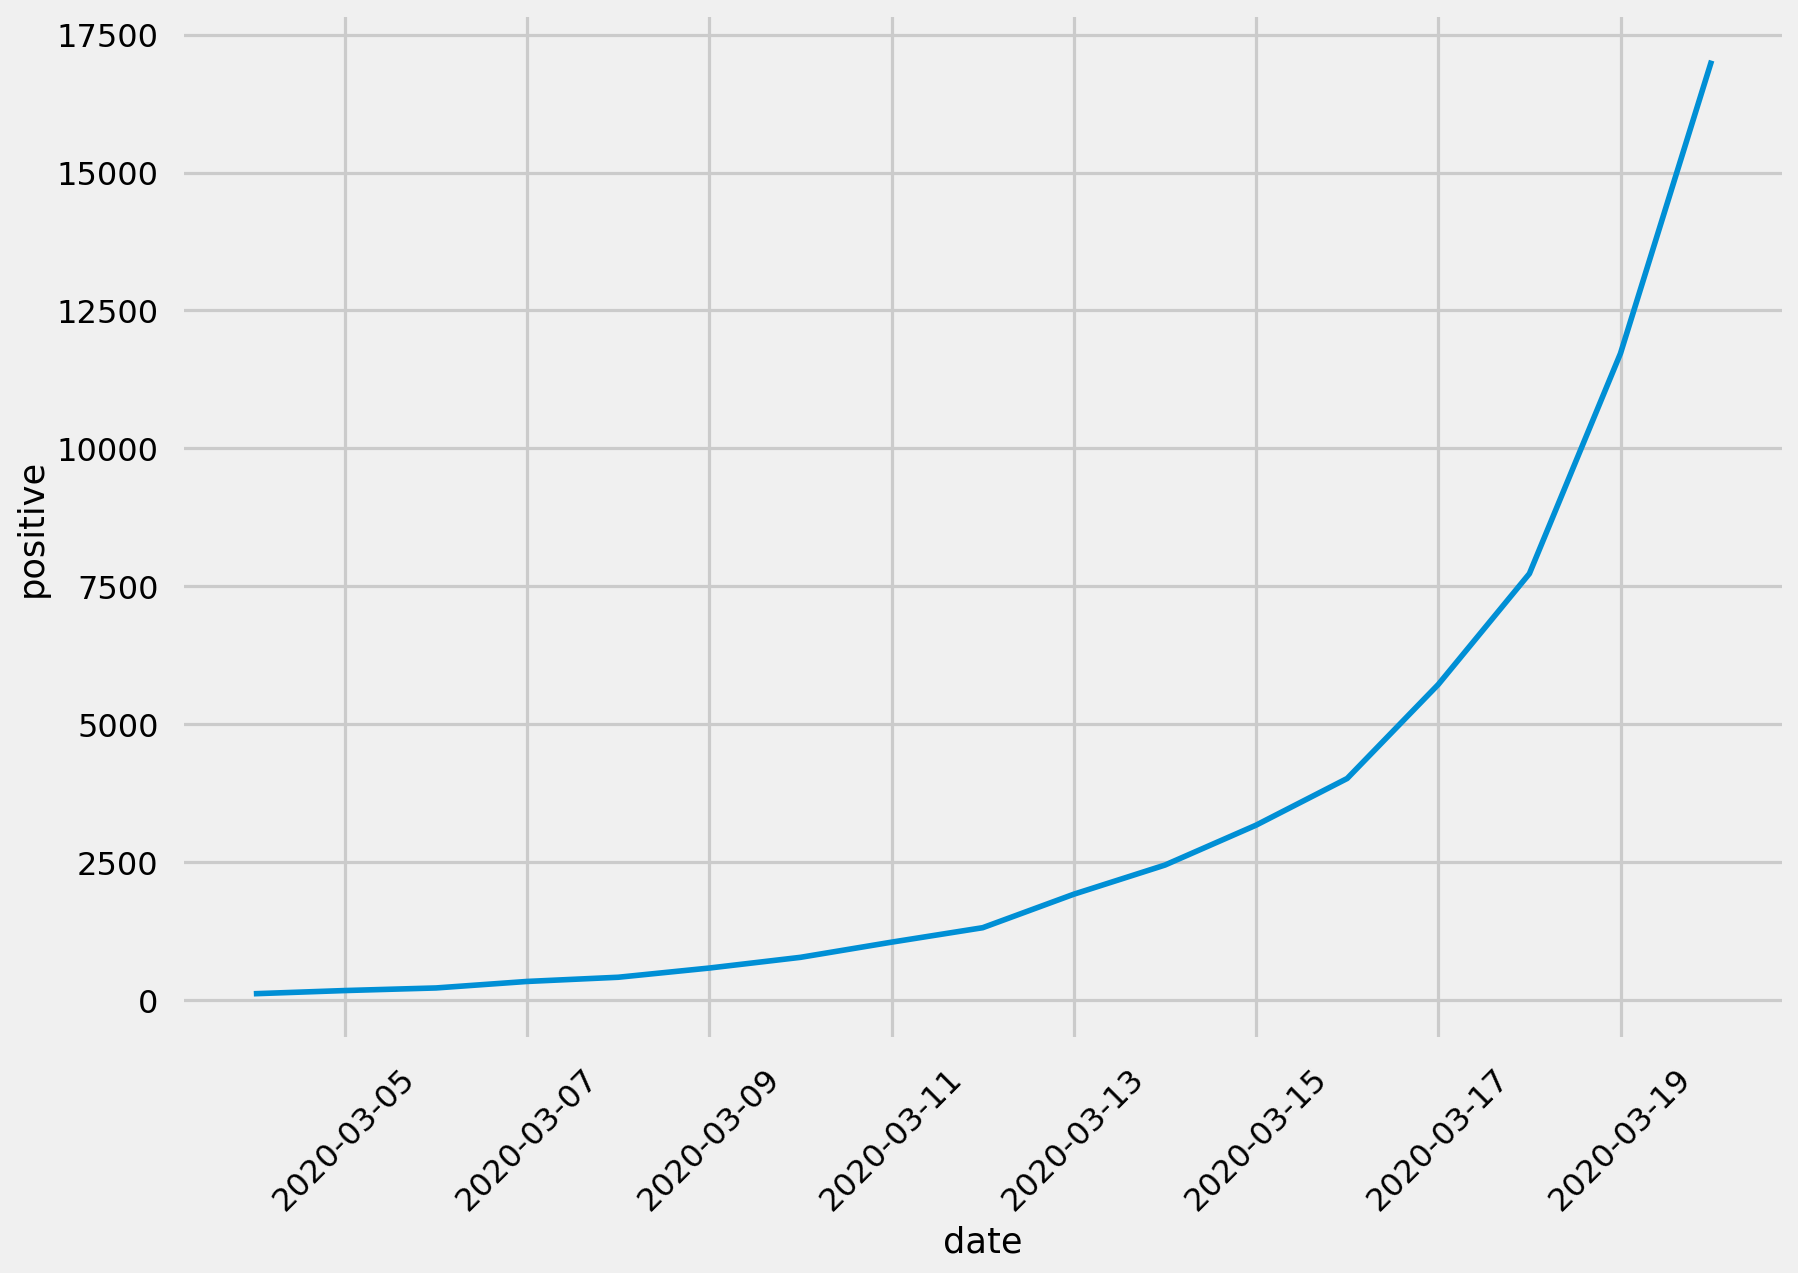

In [61]:
ax = sns.lineplot(x="date", y="positive", 
                  data=df_us)
plt.xticks(rotation=45)

# California Positive Cases

(array([737489., 737491., 737493., 737495., 737497., 737499., 737501.,
        737503.]),
 <a list of 8 Text xticklabel objects>)

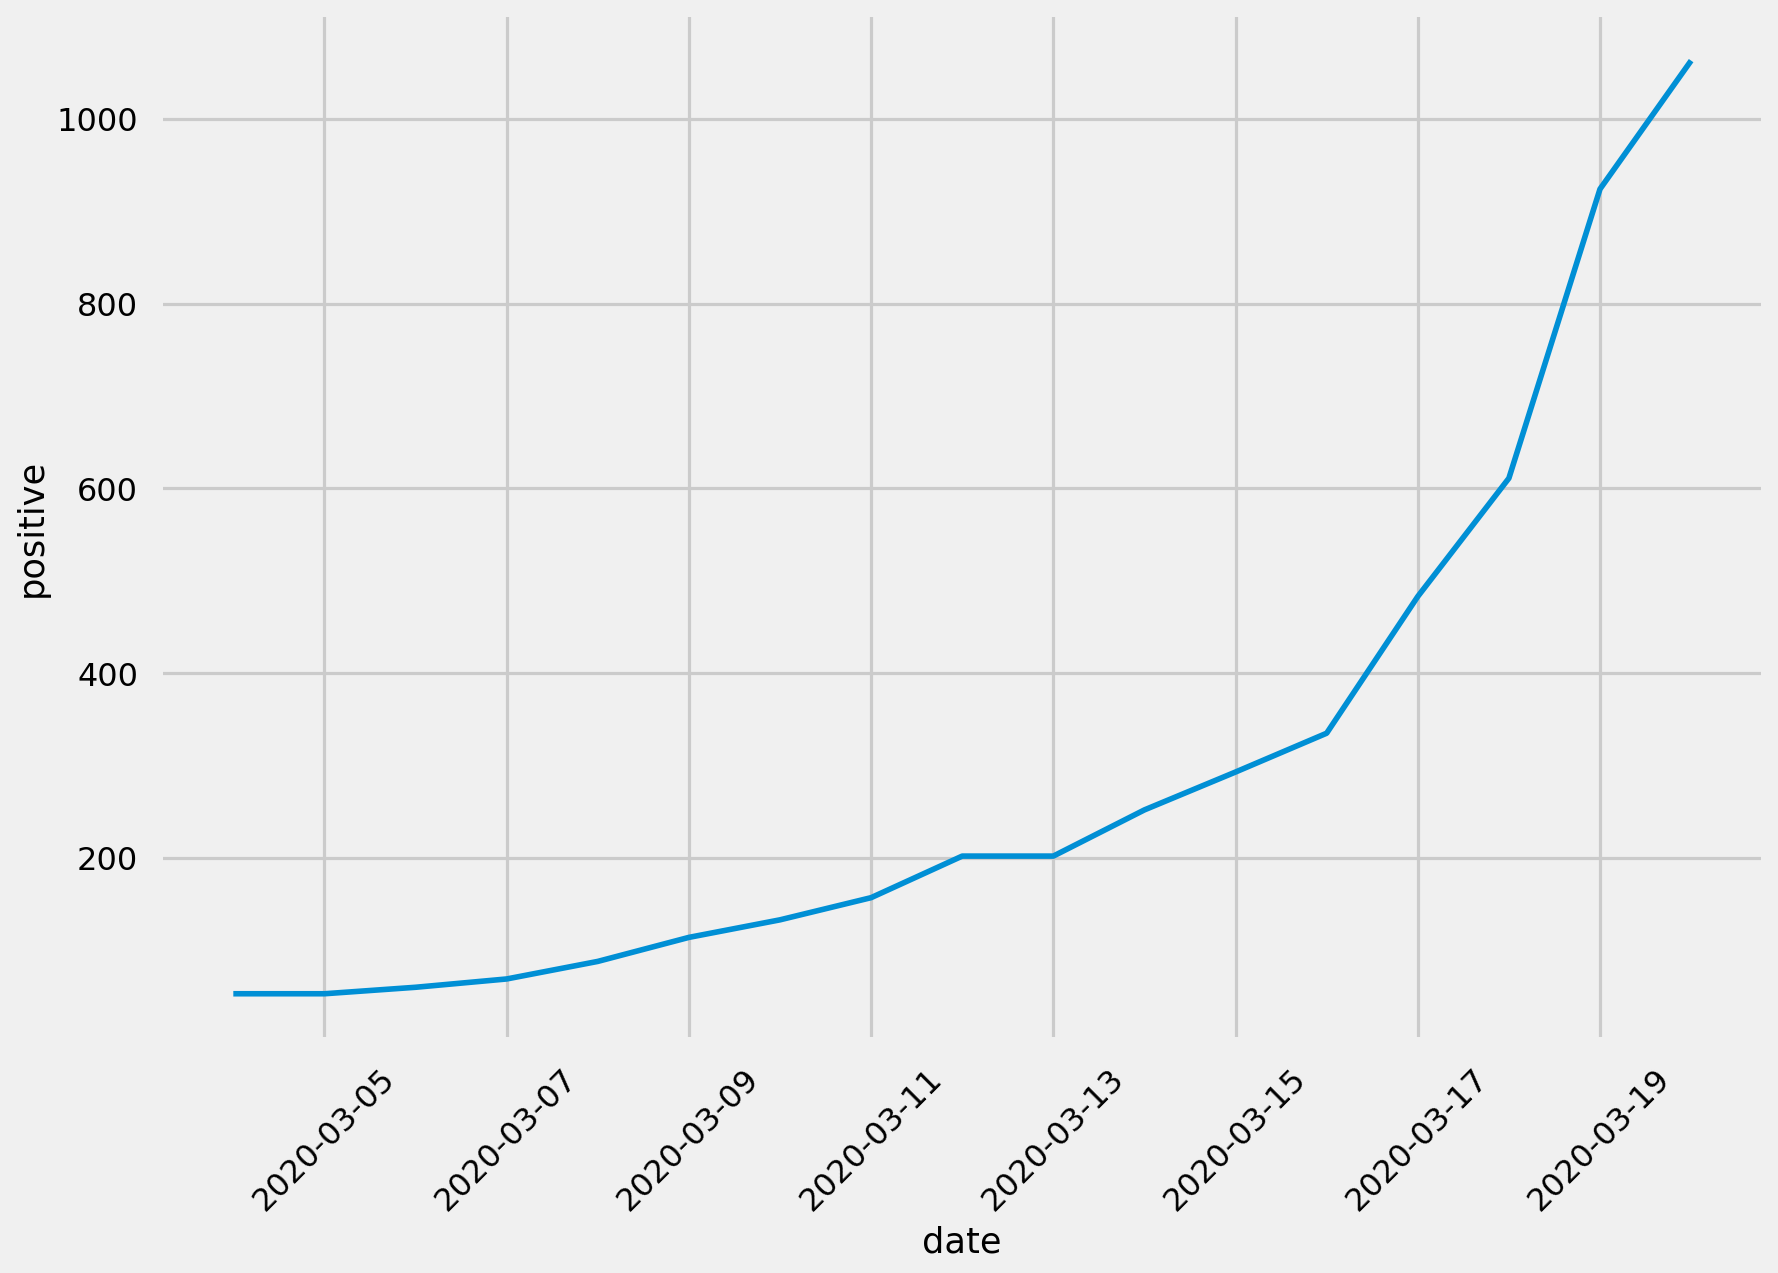

In [62]:
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "CA"'))
plt.xticks(rotation=45)

# By State Positive Cases

(array([737489., 737491., 737493., 737495., 737497., 737499., 737501.,
        737503.]),
 <a list of 8 Text xticklabel objects>)

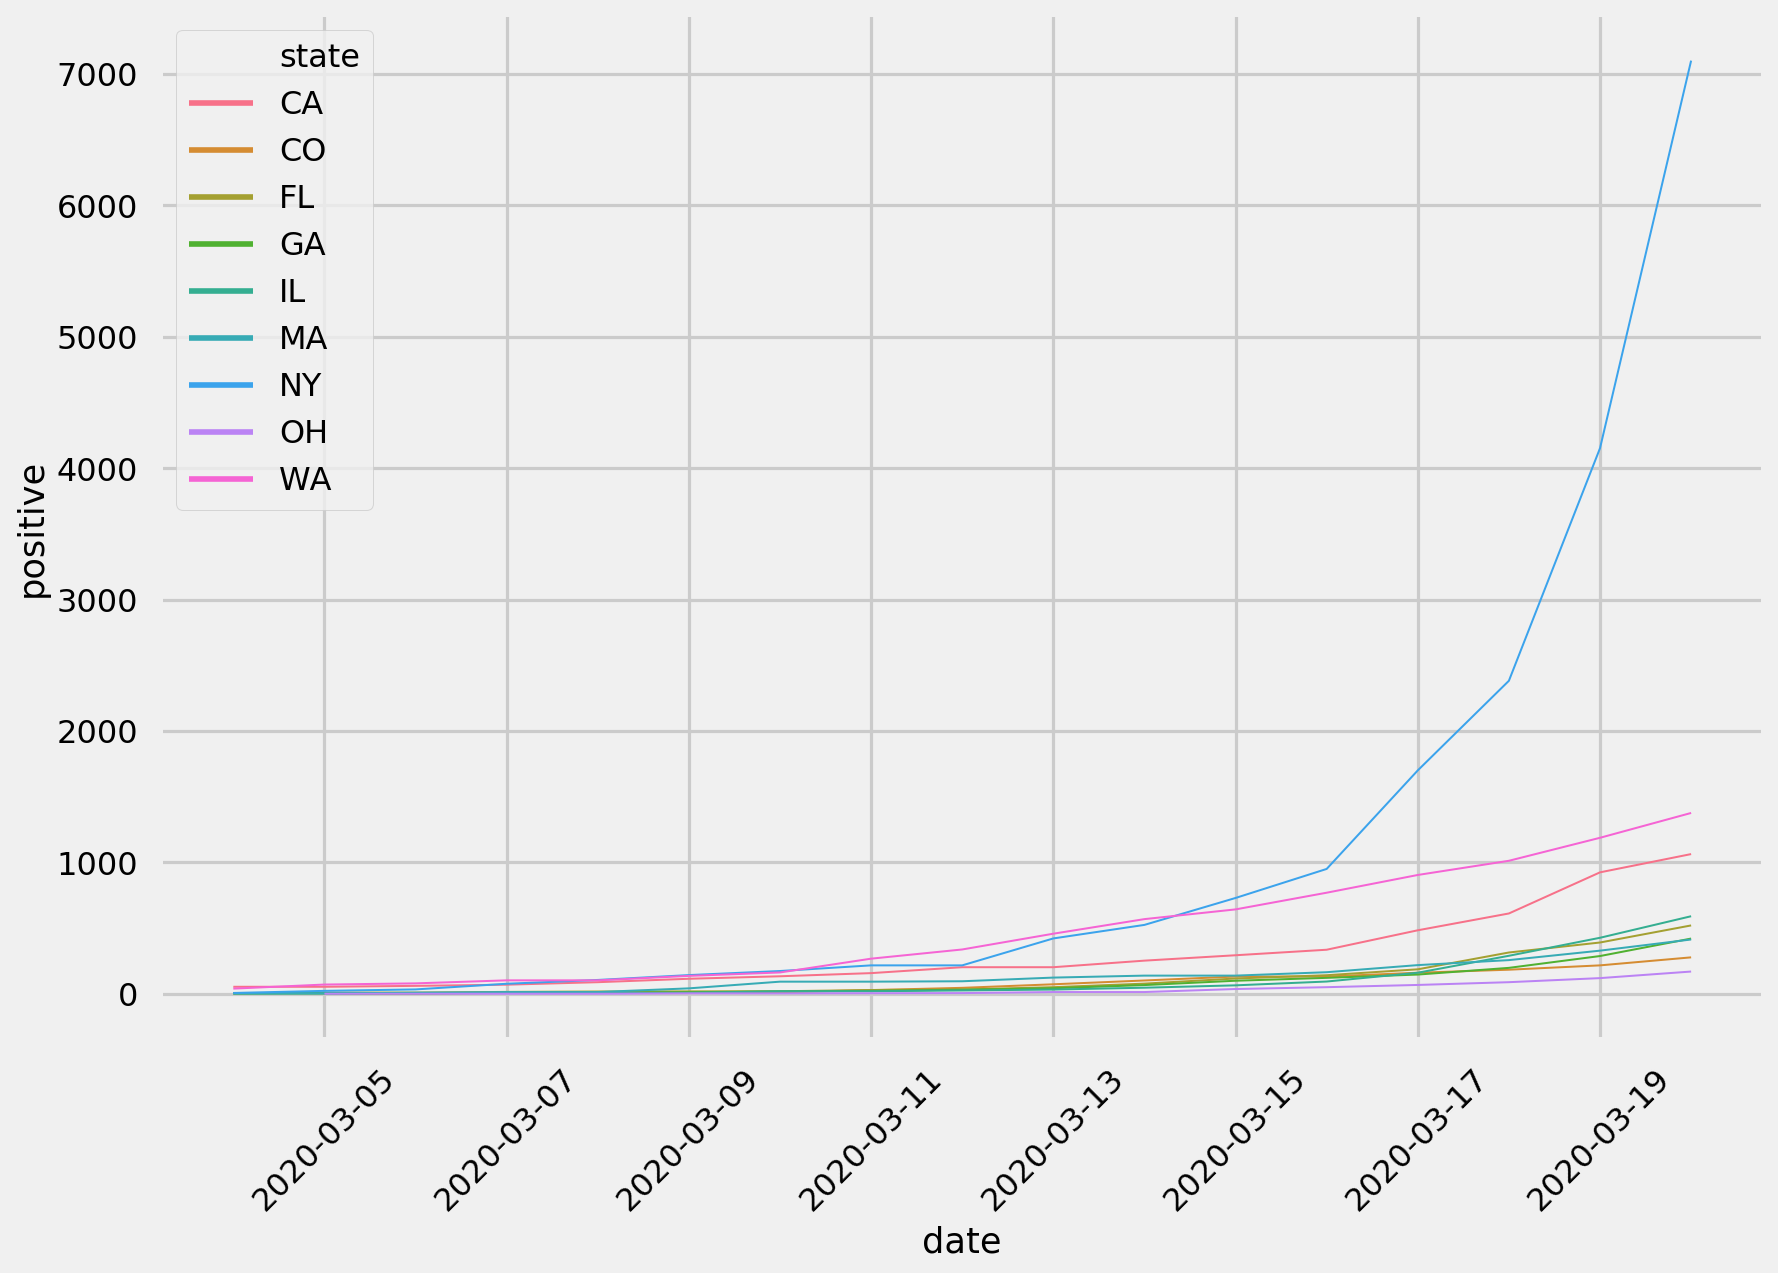

In [63]:
top_states = ["CA", "CO", "NY", "IL", "MA", "FL", "GA", "OH", "WA"]
ax = sns.lineplot(x="date", y="positive", hue="state",
                  estimator=None, lw=1,
                  data=df_states.query('state == @top_states'))
plt.xticks(rotation=45)

# By State Positive Cases (Log Scale)

(array([737489., 737491., 737493., 737495., 737497., 737499., 737501.,
        737503.]),
 <a list of 8 Text xticklabel objects>)

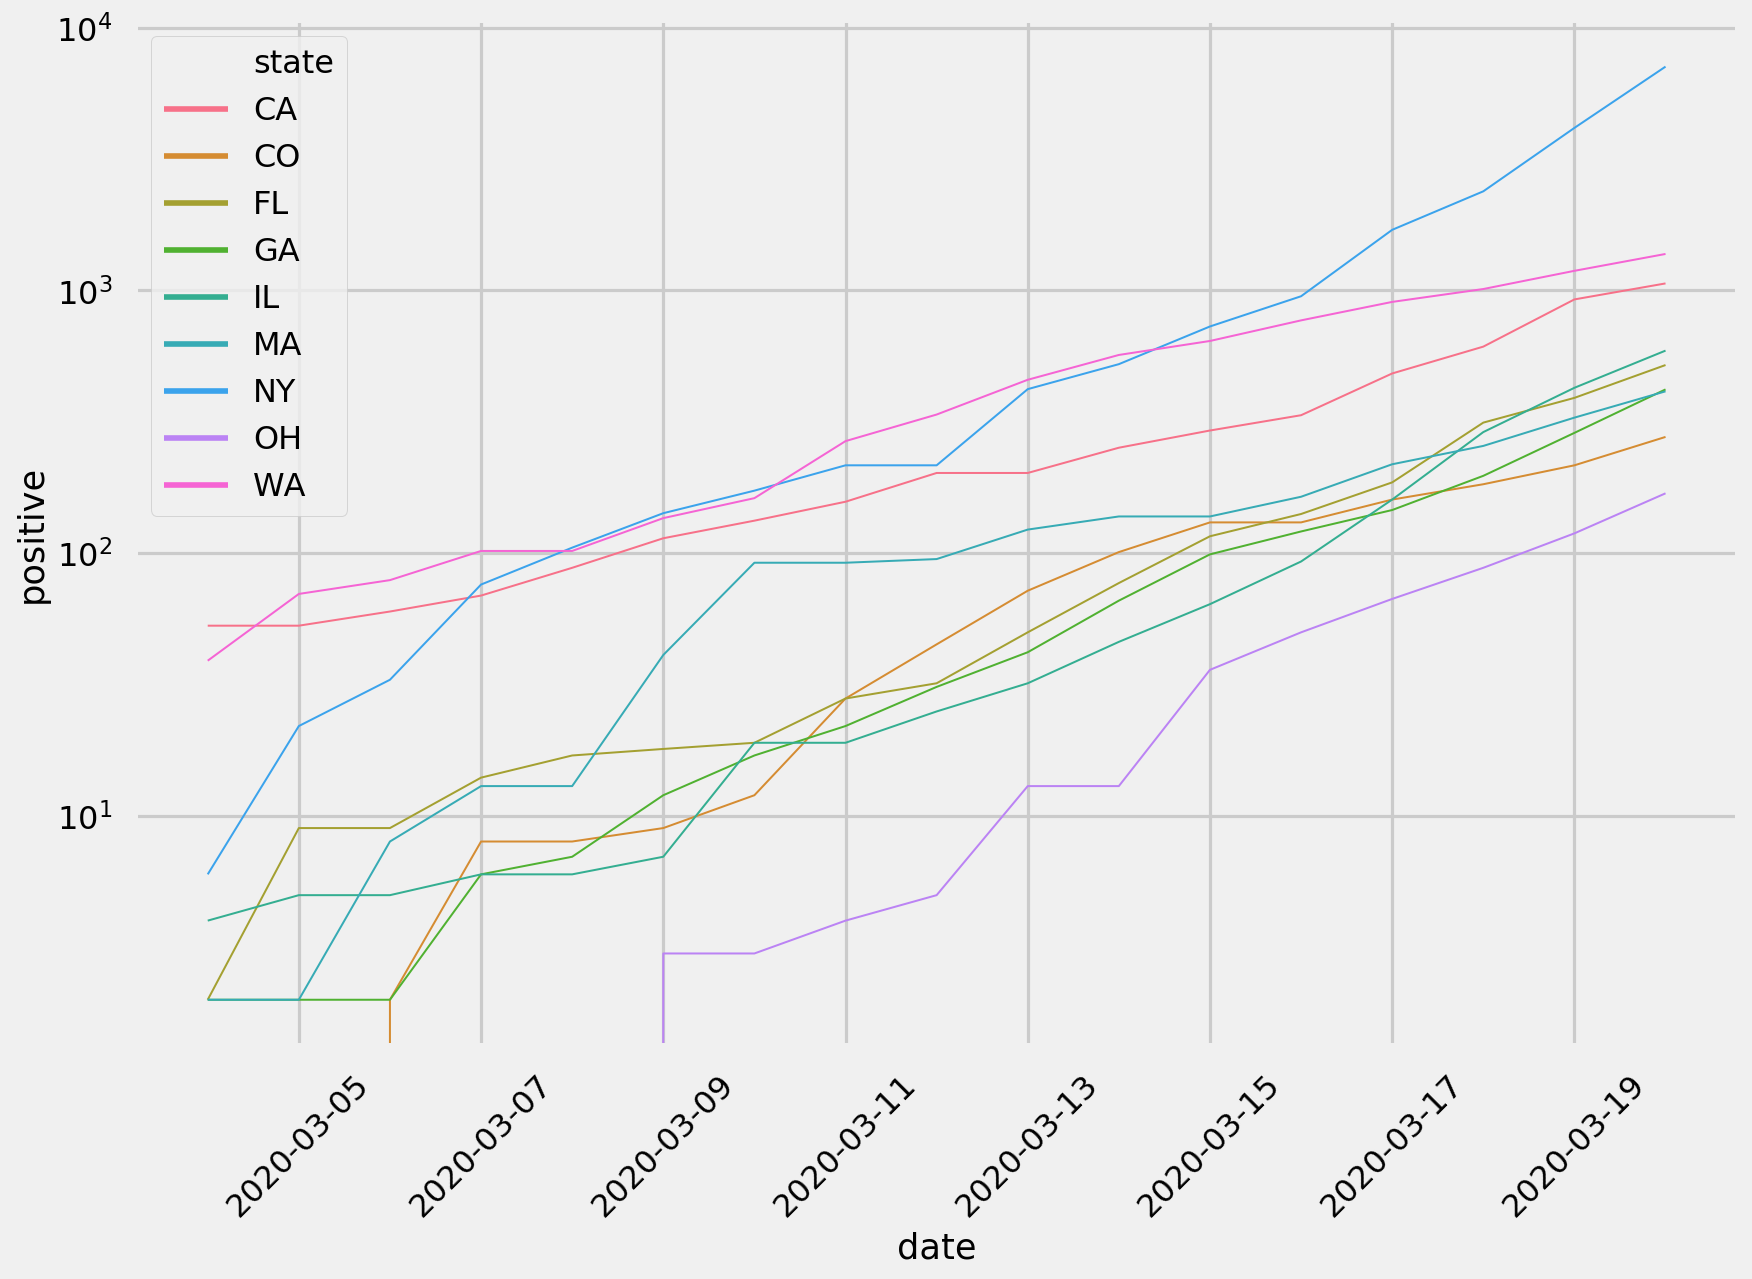

In [64]:
ax = sns.lineplot(x="date", y="positive", hue="state",
                  estimator=None, lw=1,
                  data=df_states.query('state == @top_states'))
ax.set_yscale('log')
plt.xticks(rotation=45)

# By State Positive Cases as Percent of Population

(array([737489., 737491., 737493., 737495., 737497., 737499., 737501.,
        737503.]),
 <a list of 8 Text xticklabel objects>)

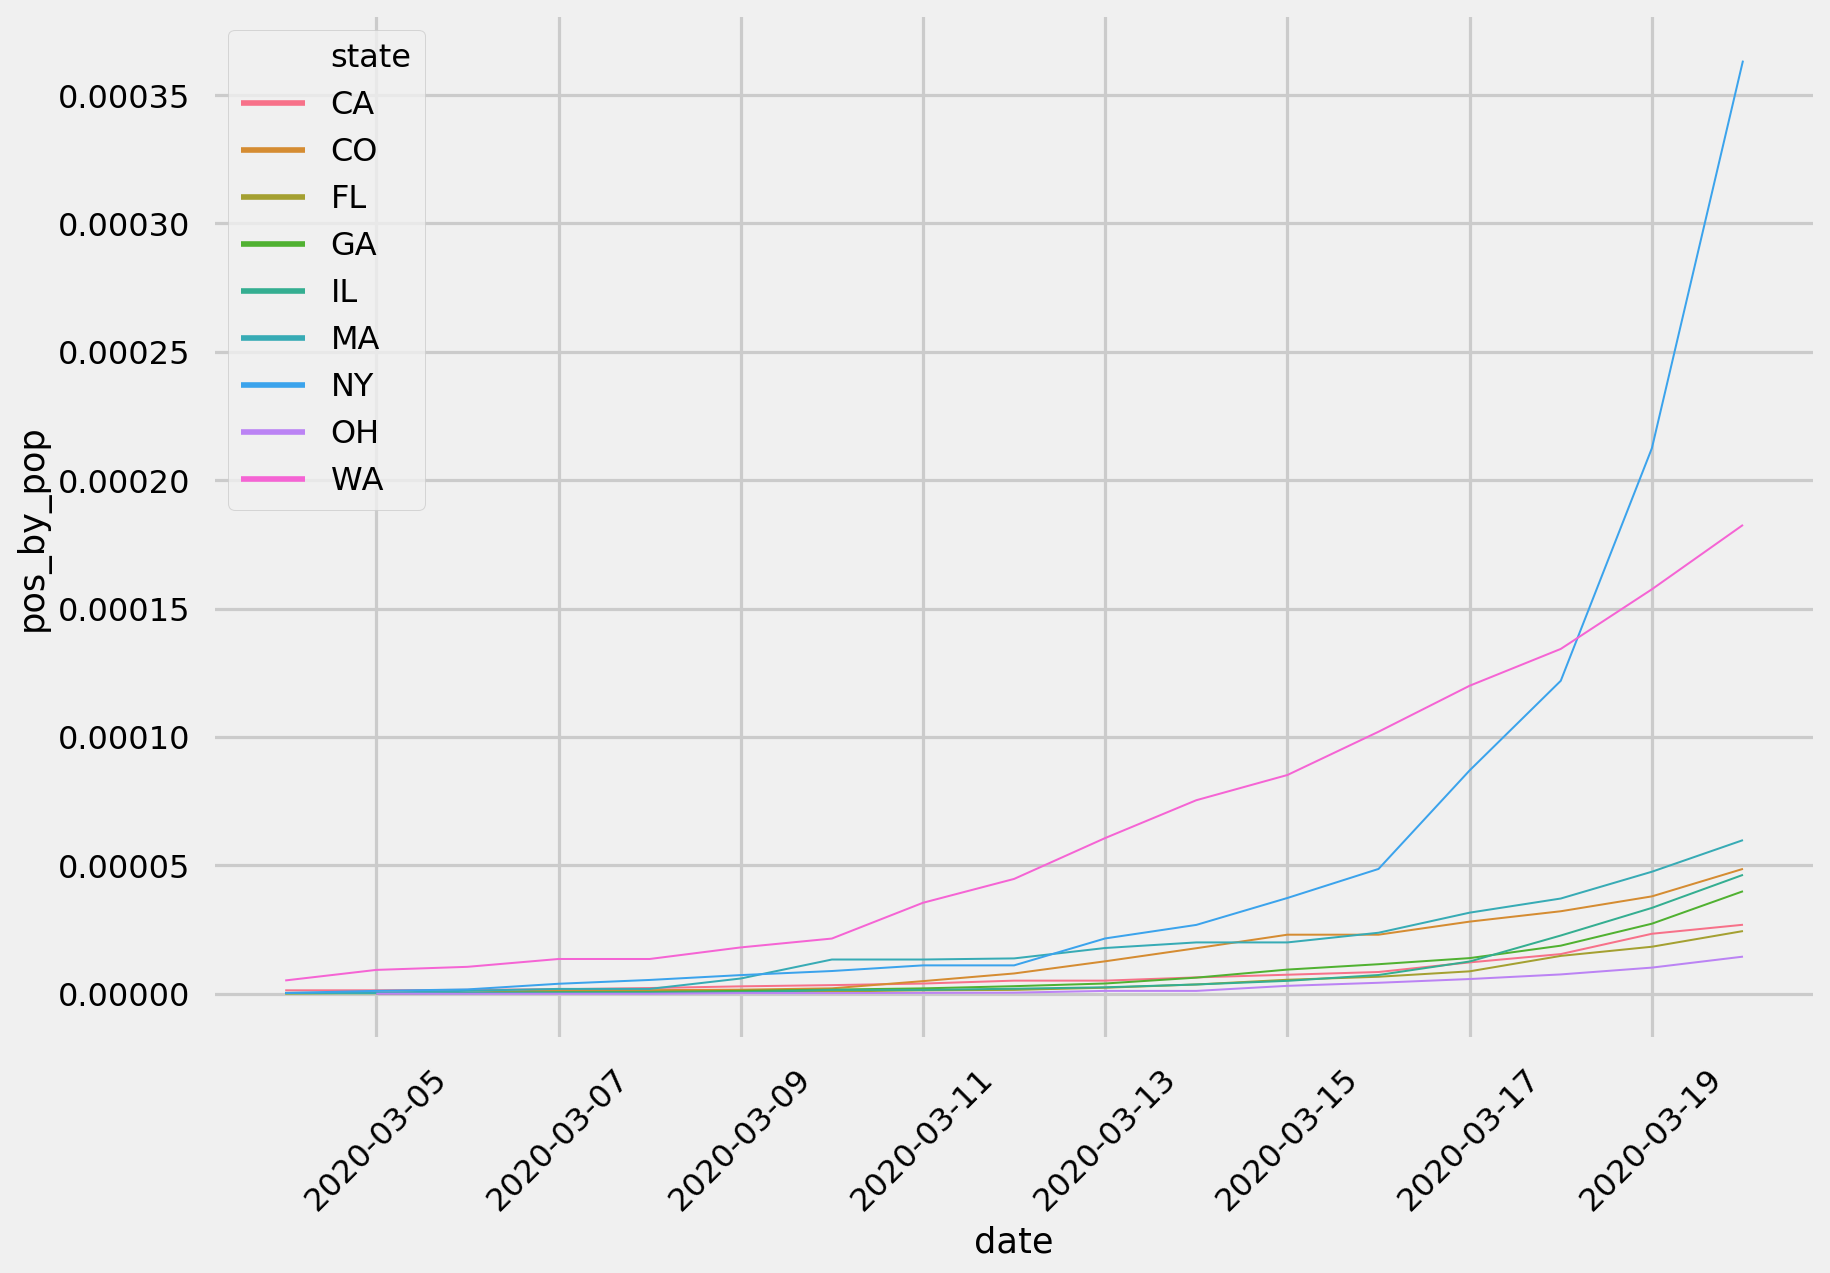

In [65]:
ax = sns.lineplot(x="date", y="pos_by_pop", hue="state",
                  estimator=None, lw=1,
                  data=df_states.query('state == @top_states'))
plt.xticks(rotation=45)

# By State Positive Cases as Percent of Population (Log Scale)

(array([737489., 737491., 737493., 737495., 737497., 737499., 737501.,
        737503.]),
 <a list of 8 Text xticklabel objects>)

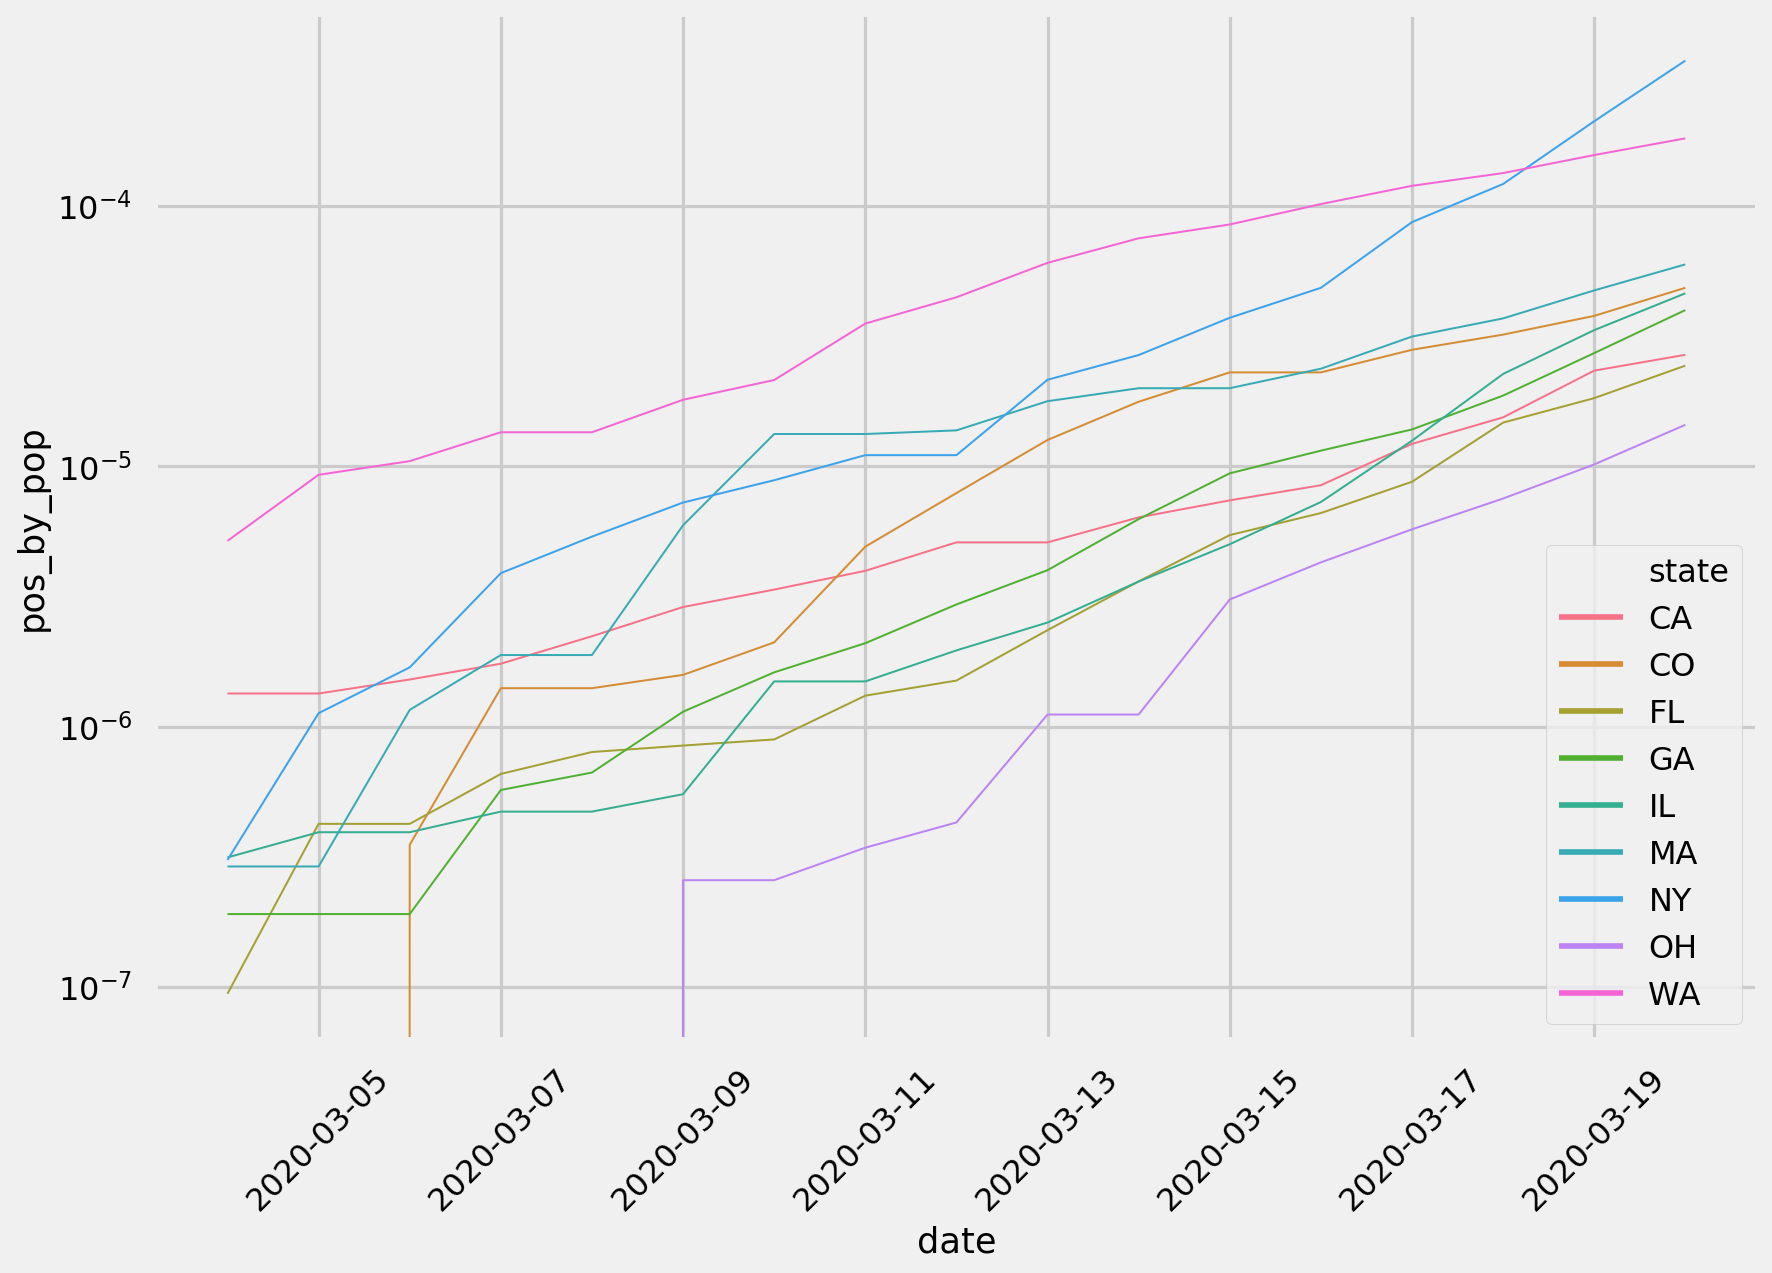

In [66]:
ax = sns.lineplot(x="date", y="pos_by_pop", hue="state",
                  estimator=None, lw=1,
                  data=df_states.query('state == @top_states'))
ax.set_yscale('log')
plt.xticks(rotation=45)